# Starbucks - Nutrition Facts and Analysis

# **Introduction**

## Starbucks 
Starbucks coffee shop first opened its doors in Seattle, WA by three students on March 30, 1971 and it has become the biggest coffee chain in the world. Starbucks has over 31,000 stores, includig Starbucks Reserve stores and pickup-only stores. It seems like there is Starbucks on almost every corner in every town (especially in the big cities). Starbucks has variety of drinks menu including signature drinks and seasonal drinks during fall and winter season. Customers can also create customized drinks by adding more espresso shots, syrups, milks, etc. Since I really like drinking coffee, I though it would really interesting to see and anaylse nutrition facts in aech Starbucks drinks from the dataset.   


## Breakdown of this notebook:
1. **Importing Libraries**
2. **Loading the Dataset**
    * Load data into a Pandas DataFrame
    * Print the Datatypes of the dataset
    * Remove the duplicates if any
    * Print column names
3. **Data Cleaning**
    * Check for the null values in each column 
4. **Questions and Data Visualizations:**
    * Plot Beverage_category 
    * Q1. Which Starbucks drink has the highest calories from the dataset? 
    * Q2. Which drink has the highest calories from the Starbucks classic espresso drinks?
    * Q3. Signature Espresso Drinks vs TazoÂ® Tea Drinks calories
    * Q4. Plot Historgram
    * Q5. Get Correlation between different variables
        * Calories vs Sugars
        * Caloreis vs Total Carbohydrates
        * Calories vs Total Fat
    * Q6. Map of Correlation betweeen Different Variables
5. **Conclusion**

### Aknowledgements:

This public dataset is part of Starbucks, and the original source can be found on this [website](https://www.kaggle.com/starbucks/starbucks-menu).

# 1. Importing Libraries

In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress deprecation and incorrect usage warnings 
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the Dataset

### * Load data into a Pandas DataFrame

In [3]:
df = pd.read_csv(r'C:\Users\Ni Qie\Desktop\springboard\craft a story from dataset\starbucks_drinkMenu_expanded.csv')
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


### * Print the Datatypes of the dataset

In [4]:
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

### * Removing the Duplicates if any

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


### * Print column names

In [9]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

# 3. Data Cleaning

In [11]:
#check for the null values in each column and the null value's percentage in each column
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)                           
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)          
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])      
    return missing_values

In [12]:
missing(df)

,Missing_Number,Missing_Percent
Caffeine (mg),1,0.004132
Beverage,0,0.000000
Iron (% DV),0,0.000000
Calcium (% DV),0,0.000000
Vitamin C (% DV),0,0.000000
Vitamin A (% DV),0,0.000000
Protein (g),0,0.000000
Sugars (g),0,0.000000
Dietary Fibre (g),0,0.000000
Beverage_category,0,0.000000


* Clean data. There is only 1 null value in Caffeine (mg), so I would drop this row. 

In [18]:
df = df.dropna()
missing(df)

,Missing_Number,Missing_Percent
Beverage_category,0,0.0
Beverage,0,0.0
Iron (% DV),0,0.0
Calcium (% DV),0,0.0
Vitamin C (% DV),0,0.0
Vitamin A (% DV),0,0.0
Protein (g),0,0.0
Sugars (g),0,0.0
Dietary Fibre (g),0,0.0
Cholesterol (mg),0,0.0


# 4. Questions and Data Visualizations

In [19]:
import seaborn as sns

In [20]:
df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

### * Plot Beverage_categry

In [30]:
#Pull two columns "Beverage_category" and "Calories" from df
#Rename these two columns to "DrinkMenu" and "Calories"

df.calories = df[['Beverage_category','Calories']]
df.calories.rename(columns = {'Beverage_category':'DrinkMenu','Calories':'Calories'},inplace=True)
df.calories

,DrinkMenu,Calories
0,Coffee,3
1,Coffee,4
2,Coffee,5
3,Coffee,5
4,Classic Espresso Drinks,70
...,...,...
237,Frappuccino® Blended Crème,320
238,Frappuccino® Blended Crème,170
239,Frappuccino® Blended Crème,200
240,Frappuccino® Blended Crème,180


<Axes: xlabel='count', ylabel='DrinkMenu'>

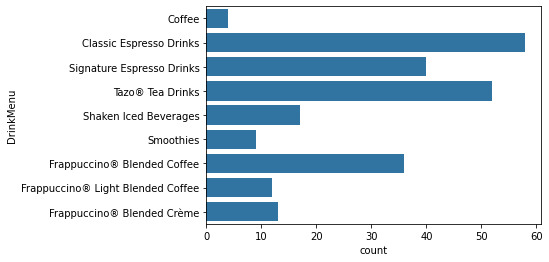

In [31]:
sns.countplot(y='DrinkMenu', data=df.calories)

### * See number of drinks from Beverage_category

In [32]:
#Create a DataFrame to see number of drinks by Beverage_category
#assign "BeverageCategory" as index 
df_beverage = pd.DataFrame(df['Beverage_category'].value_counts()).reset_index()
df_beverage.columns = ['BeverageCategory', 'NumberofDrinks']
df_beverage.head()

,BeverageCategory,NumberofDrinks
0,Classic Espresso Drinks,58
1,Tazo® Tea Drinks,52
2,Signature Espresso Drinks,40
3,Frappuccino® Blended Coffee,36
4,Shaken Iced Beverages,17


## Q1. Which Starbucks drink has the highest calories from the dataset?

In [33]:
#To see which Starbucks drink has the highes calories Beverage_category
df.calories.sort_values("Calories", ascending=False)

,DrinkMenu,Calories
84,Signature Espresso Drinks,510
215,Frappuccino® Blended Coffee,460
85,Signature Espresso Drinks,460
83,Signature Espresso Drinks,450
128,Tazo® Tea Drinks,450
...,...,...
0,Coffee,3
102,Tazo® Tea Drinks,0
105,Tazo® Tea Drinks,0
104,Tazo® Tea Drinks,0


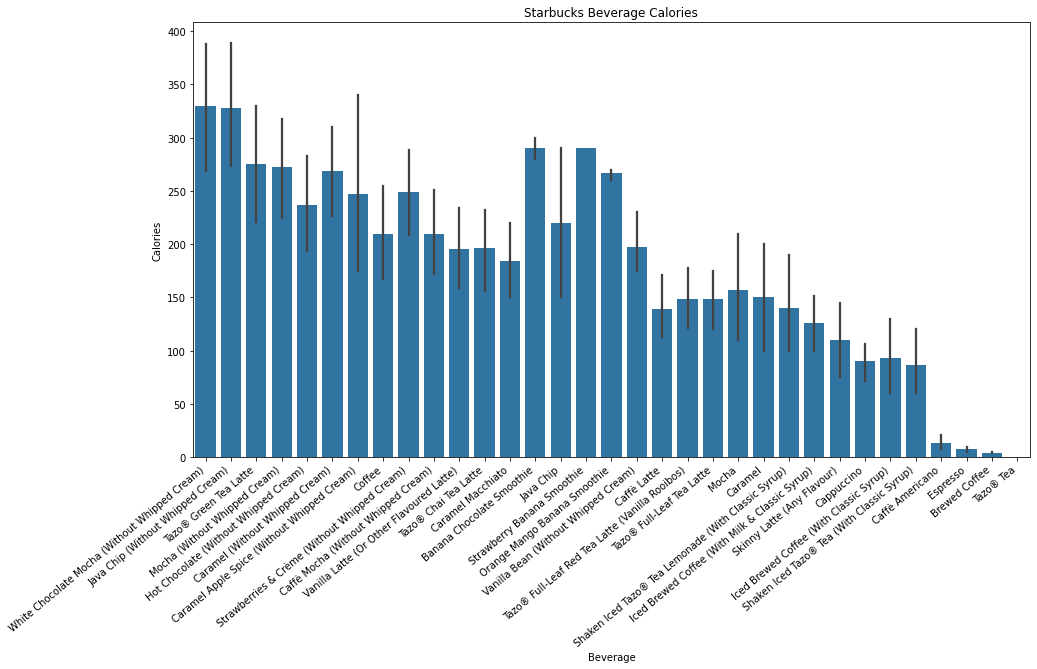

In [36]:
# data visualization to see the which Starbucks drink has the highest calories

# Sort the DataFrame by the 'Calories' column
df_sorted = df.sort_values(by='Calories', ascending=False)

# Create a bar plot with the sorted data
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y="Calories", data=df_sorted)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Calories")
plt.show()

* Overall, White chocolate mocha (without whipped cream), followed by Java Chip (Without Whipped Cream) out of the entire starbucks drinks

## Q2. Which drink has the highest calories from the Starbucks classic espresso drinks?

In [38]:
#extract classic espress drinks from Beverage_category
classic = df.loc[(df['Beverage_category'] == 'Classic Espresso Drinks')]
classic.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75


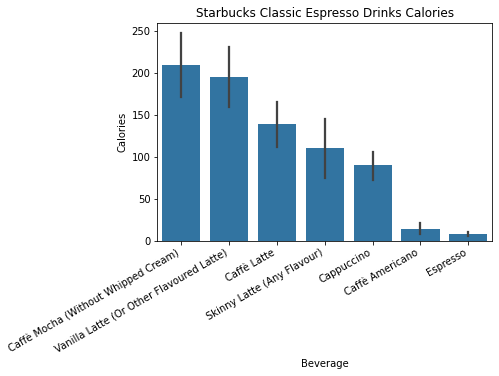

In [39]:
# data visualization to see which classic espresso drink has the highest calories
# Sort the 'classic' DataFrame by the 'Calories' column in descending order
classic_sorted = classic.sort_values(by='Calories', ascending=False)

# Create a bar plot with the sorted data
sns.barplot(x="Beverage", y="Calories", data=classic_sorted)
plt.xticks(rotation=30, ha='right')
plt.title("Starbucks Classic Espresso Drinks Calories")
plt.show()

* Caffe Mocha (without whipped cream) has the highest kcal, followed by vanilla latte(or other flavoured latte) from the Starbucks classic espresso drinks.

## Q3. Signature vs Tazo® Tea Drinks calories

Text(0.5, 1.0, 'Tazo® Tea Drinks')

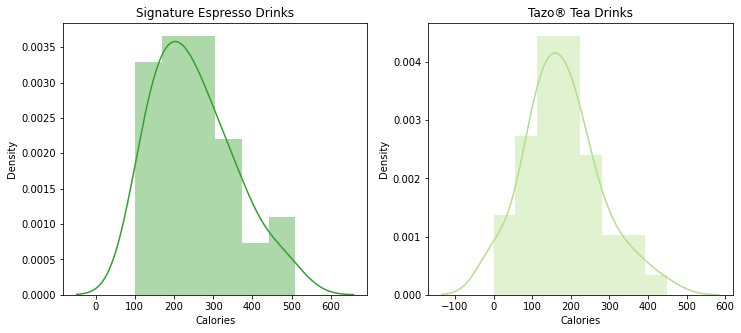

In [51]:
# We want to compare the calories between Signature Espresso Drinks vs Tazo® Tea Drinks

figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(df['Calories'].loc[df['Beverage_category'] == 'Signature Espresso Drinks'],
             norm_hist=False, color=sns.color_palette("Paired")[3], ax=ax1)
ax1.set_title('Signature Espresso Drinks')

figure.set_size_inches(12,5)
sns.distplot(df['Calories'].loc[df['Beverage_category'] == 'Tazo® Tea Drinks'],
             norm_hist=False, color=sns.color_palette("Paired")[2], ax=ax2)
ax2.set_title('Tazo® Tea Drinks')

For the "Signature Espresso Drinks," the plot suggests a distribution that peaks around the lower calorie range, indicating that most of these drinks are likely to be lower in calories, with fewer drinks having higher calorie counts.

On the other hand, the "Tazo® Tea Drinks" plot also peaks at a lower calorie range but has a slightly wider spread, which might imply a broader range of calorie values in these drinks.

In [54]:
df.groupby('Beverage_prep').count()

,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage_prep,,,,,,,,,,,,,,,,,
2% Milk,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
Doppio,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Grande,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Grande Nonfat Milk,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
Short,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Short Nonfat Milk,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Solo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Soymilk,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
Tall,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


## Q4. Plot Historgram 

Text(0, 0.5, 'Count')

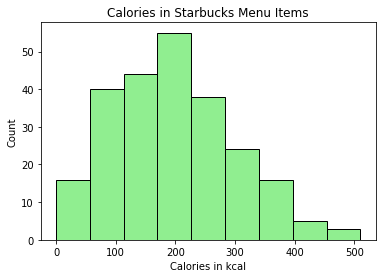

In [55]:
#plot a historgram of calories data
calories = df["Calories"]
plt.hist(calories, bins=9, edgecolor = "black", color = "lightgreen")
plt.title("Calories in Starbucks Menu Items")
plt.xlabel("Calories in kcal")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

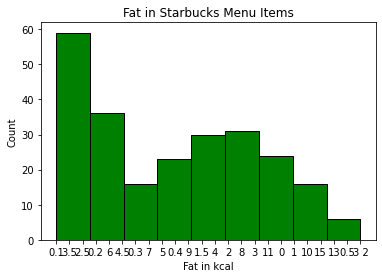

In [56]:
#plot a historgram of total fag(g) data
fat = df[" Total Fat (g)"]
plt.hist(fat, bins=9, edgecolor = "black", color = "green")
plt.title("Fat in Starbucks Menu Items")
plt.xlabel("Fat in kcal")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

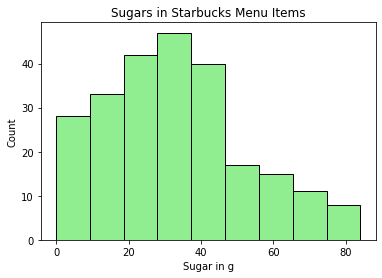

In [57]:
#plot a historgram of sugar data
fat = df[" Sugars (g)"]
plt.hist(fat, bins=9, edgecolor = "black", color = "lightgreen")
plt.title("Sugars in Starbucks Menu Items")
plt.xlabel("Sugar in g")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

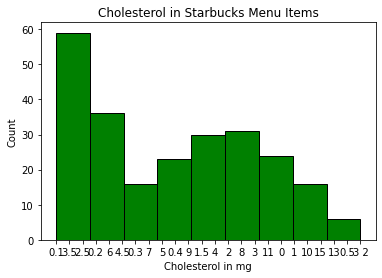

In [58]:
# plot a historgram of choresterol data
# histogram
fat = df[" Total Fat (g)"]
plt.hist(fat, bins=9, edgecolor = "black", color = "green")
plt.title("Cholesterol in Starbucks Menu Items") # add a title
plt.xlabel("Cholesterol in mg")
plt.ylabel("Count")

## Q5. Correlation between Different Variables

### * Correlation between Calories vs Sugars (g)

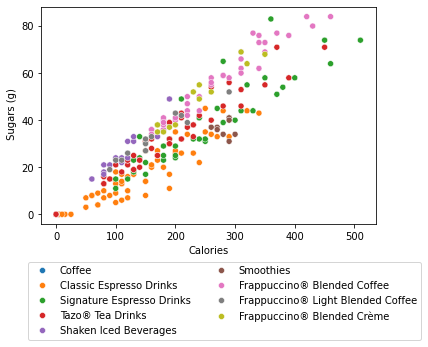

In [61]:
# Calories vs Sugars (g)
sns.scatterplot(data=df, x="Calories", y=" Sugars (g)", hue="Beverage_category")
plt.legend(bbox_to_anchor=(1.15, -0.15), ncol= 2)

* There is correlation between calories and sugars. 

### * Correlation between Calories vs Total Carbohydrates (g)

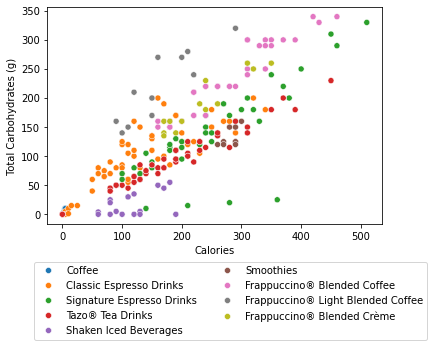

In [62]:
# Calories vs Total Carbohydrates
sns.scatterplot(data=df, x="Calories", y=" Total Carbohydrates (g) ",hue="Beverage_category")
plt.legend(bbox_to_anchor=(1.15, -0.15), ncol= 2)
plt.show()

* There is correlation between calories and total carbohydrates 

### * Calories vs Total Fat (g)

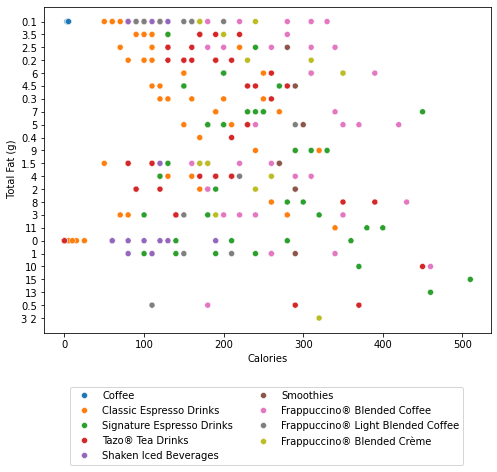

In [63]:
# Calories vs Total Fat (g)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Calories", y=" Total Fat (g)", hue="Beverage_category")
plt.legend(bbox_to_anchor=(0.95, -0.15), ncol= 2)
plt.show()

* It's interesting to see that there isn't much correlation between calories and total fat(g) compare to calories vs sugars(g) and caloreis vs cholresterol

<Axes: xlabel='Calories', ylabel=' Total Fat (g)'>

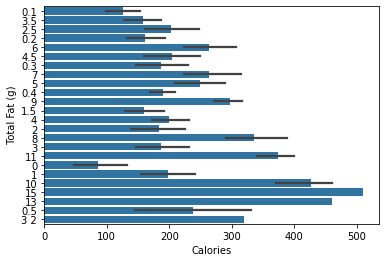

In [64]:
sns.barplot(data=df, x="Calories", y=" Total Fat (g)")

<Axes: xlabel='count', ylabel='Beverage_prep'>

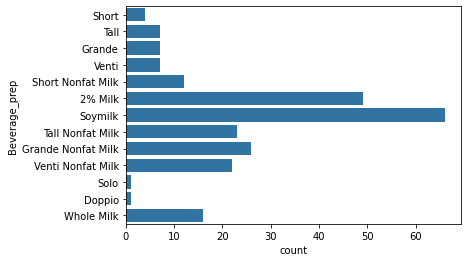

In [65]:
sns.countplot(y="Beverage_prep", data=df)

### * Drop Irrevelant Columns 

In [67]:
dfcopy = df.copy()
dfcopy
dfcopy.drop(['Beverage_prep','Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',' Total Carbohydrates (g) ', ' Dietary Fibre (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Caffeine (mg)'], axis=1, inplace=True)
# examing the changes
dfcopy.head()

,Beverage_category,Beverage,Calories,Total Fat (g),Cholesterol (mg),Sugars (g),Iron (% DV)
0,Coffee,Brewed Coffee,3,0.1,0,0,0%
1,Coffee,Brewed Coffee,4,0.1,0,0,0%
2,Coffee,Brewed Coffee,5,0.1,0,0,0%
3,Coffee,Brewed Coffee,5,0.1,0,0,0%
4,Classic Espresso Drinks,Caffè Latte,70,0.1,10,9,0%


### * Encode the input variables

In [68]:
#Encode the input variables
def Encode(dfcopy):
    for column in dfcopy.columns[dfcopy.columns.isin(['Beverage_categry', 'Beverage'])]:
        dfcopy[column] = dfcopy[column].factorize()[0]
    return dfcopy

df_en = Encode(dfcopy.copy())

In [69]:
df_en.head(15)

,Beverage_category,Beverage,Calories,Total Fat (g),Cholesterol (mg),Sugars (g),Iron (% DV)
0,Coffee,0,3,0.1,0,0,0%
1,Coffee,0,4,0.1,0,0,0%
2,Coffee,0,5,0.1,0,0,0%
3,Coffee,0,5,0.1,0,0,0%
4,Classic Espresso Drinks,1,70,0.1,10,9,0%
5,Classic Espresso Drinks,1,100,3.5,10,9,0%
6,Classic Espresso Drinks,1,70,2.5,6,4,8%
7,Classic Espresso Drinks,1,100,0.2,15,14,0%
8,Classic Espresso Drinks,1,150,6,15,14,0%
9,Classic Espresso Drinks,1,110,4.5,10,6,15%


# Q6. Map of Correlation betweeen Different Variables

Index(['Calories', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) '],
      dtype='object')

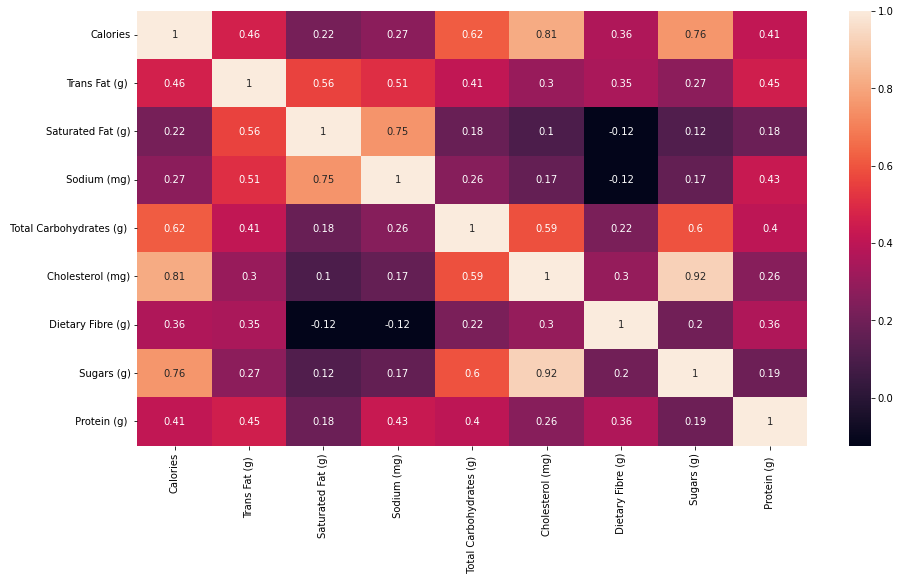

In [72]:
#Get correlation between different variables 
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the Kendall correlation on the numeric columns
corr = numeric_df.corr(method='kendall')

# Plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

# Output the columns included in the correlation
numeric_df.columns

# 5. Conclusion
Calorie Content: Higher calorie counts are strongly associated with higher levels of cholesterol and sugar.

Fats Relationship: There's a significant positive correlation between trans fats and saturated fats, indicating that drinks with more of one tend to have more of the other.

Carbohydrates and Sugars: As expected, there's a strong link between the total carbohydrates and sugar content in beverages.

Cholesterol and Sugars: The unusually high correlation between cholesterol and sugars may indicate that drinks with added sugars also include high-cholesterol ingredients.

Protein Independence: Protein content does not show a strong correlation with fats or sugars, suggesting protein-rich drinks might offer a healthier profile.